In [1]:
import numpy as np
import scipy.io.wavfile as wav
import scipy.fftpack as fftp
import pathlib
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import IPython
DATA = pathlib.Path('../../data').resolve()

In [2]:
p = pathlib.Path('chunk.wav').resolve()
if not p.exists():
    loc = 'aow','art_of_war_01-02_sun_tzu.wav'
    f = DATA.joinpath(*loc).resolve()
    sr, sig = wav.read(str(f))
    st,sp = 25,36
    t1,t2 = st*sr,sp*sr
    wav.write(str(p), int(sr), sig[t1:t2])
else:
    sr, sig = wav.read(str(p))
    Ts = 1.0/sr
IPython.display.Audio(str(p))

In [30]:
sig.shape[0]/sr

11.0

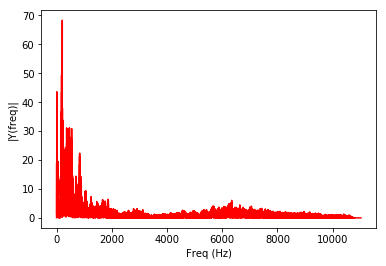

In [39]:
n = sig.shape[0] # length of the signal
k = np.arange(n)
T = n/sr
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = fftp.fft(sig)/n # fft computing and normalization
Y = Y[range(n//2)]

plt.plot(frq[1:],abs(Y[1:]),'r') # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.show()

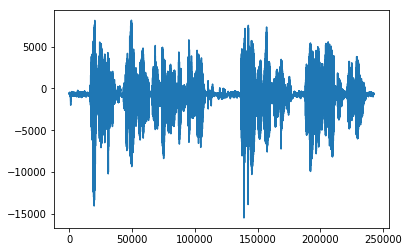

In [40]:
plt.plot(sig)
plt.show()

In [7]:
m1,m2 = sig.min(),sig.max()

In [ ]:
xfr = fftp.fft(sig)

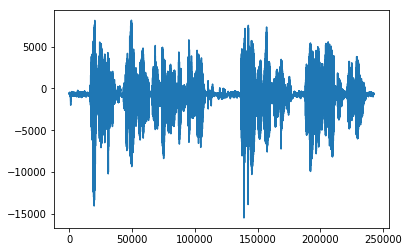

In [51]:
A = 5#abs(m1-m2)/abs(abs(m1)-abs(m2))
w = sig.shape[0]/sr
t = np.arange(len(sig))
S = A*np.cos(2*np.pi*w*t)+sig#*np.cos(2*np.pi*w*t)
plt.plot(S)
plt.show()

In [52]:
IPython.display.Audio(data=S,rate=sr)

array([-632.78415895,  588.82913051, -474.79569718, ..., -553.3967316 ,
        586.59695928, -573.42189667])